In [302]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [304]:
df = pd.read_csv('/Users/saifmohammed/Desktop/DiabetIQ/ML/Test/Copy Dataset/Diabetes_Final_Data_V20.csv')
df.head()
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [306]:
df.isna().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [310]:
df.columns

Index(['age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp', 'glucose',
       'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke', 'diabetic'],
      dtype='object')

In [312]:
df.describe()

,age,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke
count,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000,5437.000000
mean,45.533750,76.768990,133.859849,82.064742,7.540682,1.548571,53.626816,22.472301,0.037337,0.109803,0.039544,0.011587,0.003678
std,14.321155,12.290076,22.293015,12.489593,2.923080,0.080955,10.091550,8.778764,0.189603,0.312673,0.194903,0.107029,0.060545
min,8.000000,5.000000,62.000000,45.000000,0.000000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,69.000000,119.000000,73.000000,6.000000,1.520000,46.700000,19.630000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,76.000000,130.000000,81.000000,6.920000,1.550000,53.000000,21.870000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,84.000000,147.000000,90.000000,8.120000,1.600000,59.900000,24.490000,0.000000,0.000000,0.000000,0.000000,0.000000
max,112.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000


In [314]:
df.columns = map(str.lower, df.columns)

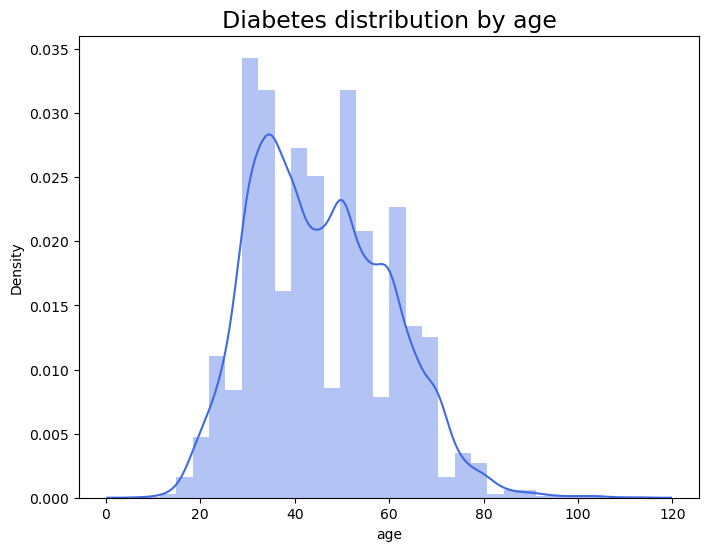

In [316]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=30, color='royalblue')  
plt.title('Diabetes distribution by age', fontsize=17);

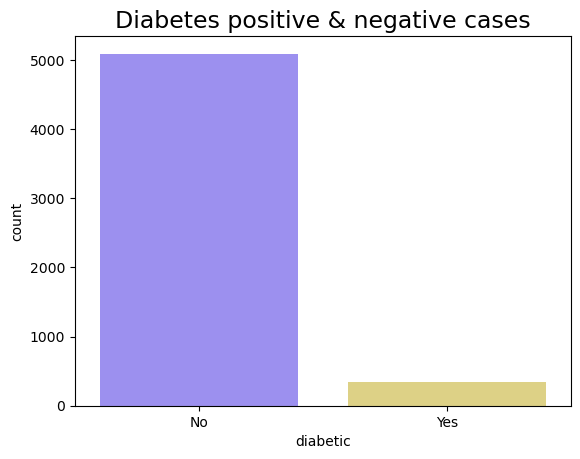

<Figure size 1500x800 with 0 Axes>

In [318]:
sns.countplot(x='diabetic', data=df, palette=['#9080ff', "#ebdc78"])
plt.title('Diabetes positive & negative cases', fontsize=17)
plt.figure(figsize=(15,8))
plt.show()

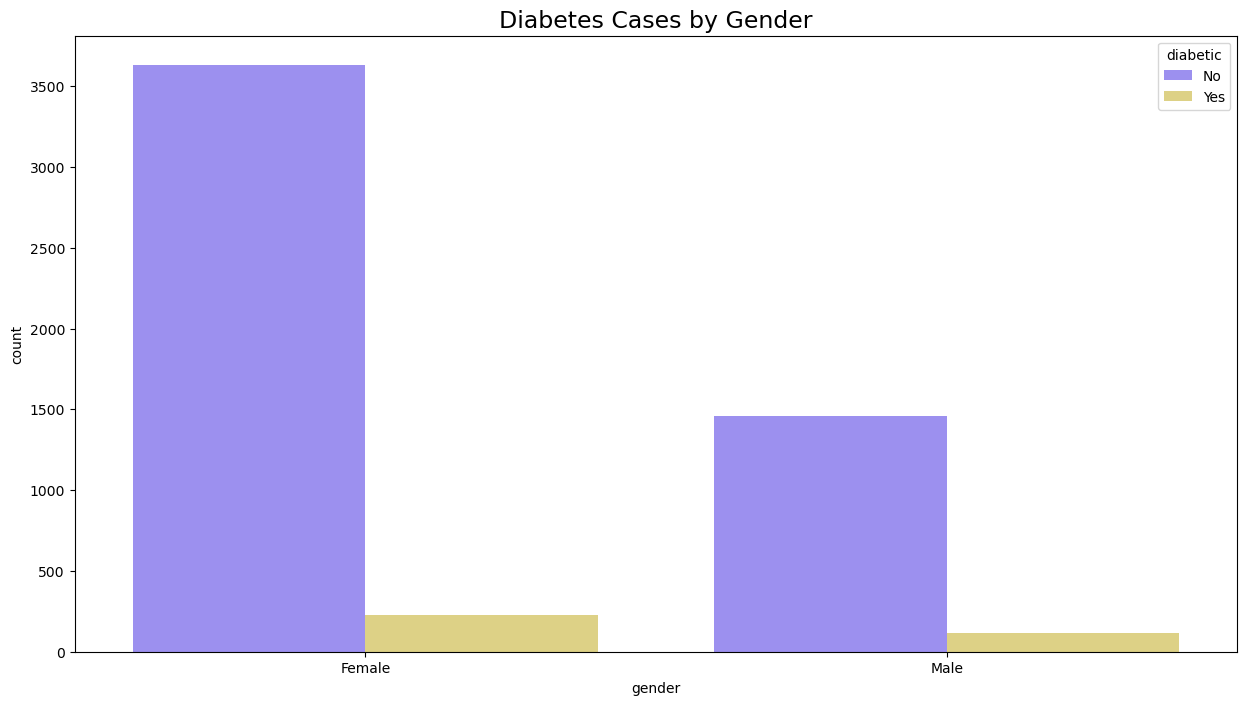

In [320]:
plt.figure(figsize=(15,8))  # Set figure size before plotting
sns.countplot(x='gender', hue='diabetic', data=df, palette=['#9080ff', "#ebdc78"])
plt.title('Diabetes Cases by Gender', fontsize=17)
plt.show()

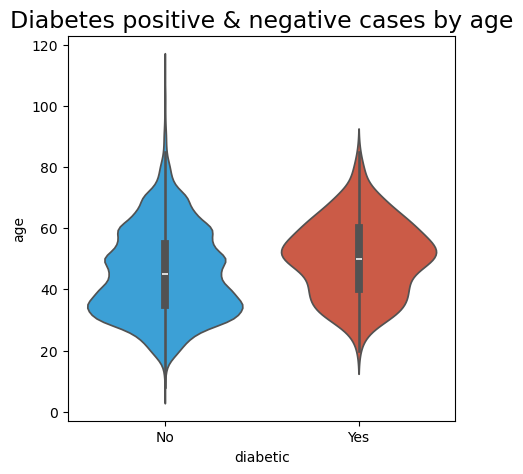

In [322]:
plt.figure(figsize=(5,5))
plt.title('Diabetes positive & negative cases by age', fontsize=17);

ax = sns.violinplot(x="diabetic", y="age", data=df, palette=['#22a7f0',"#e14b31"])
# ax.set_xticklabels({'class':['Negative','Positive']})
# ax.set_xticklabels([*'Positive'])

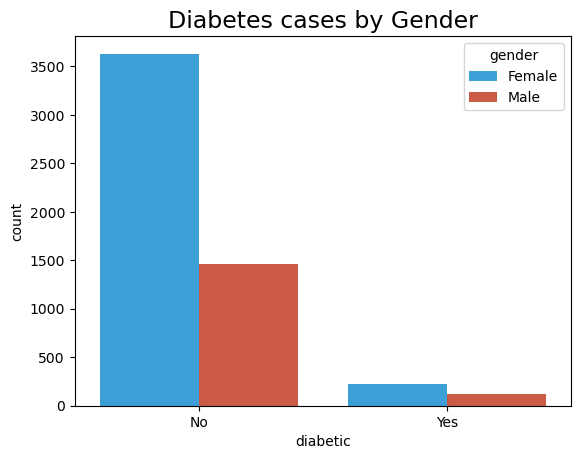

In [324]:
plt.title('Diabetes cases by Gender', fontsize=17);
ax = sns.countplot(x="diabetic", data=df, hue="gender", palette=['#22a7f0',"#e14b31"])

In [326]:
df['diabetic'] = df['diabetic'].map({'Yes':1, 'No':0})
df['gender'] = df['gender'].map({'Male':1, 'Female':0})

In [328]:
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,1,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,0
5433,75,1,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,1
5434,40,0,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,0
5435,36,0,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,0


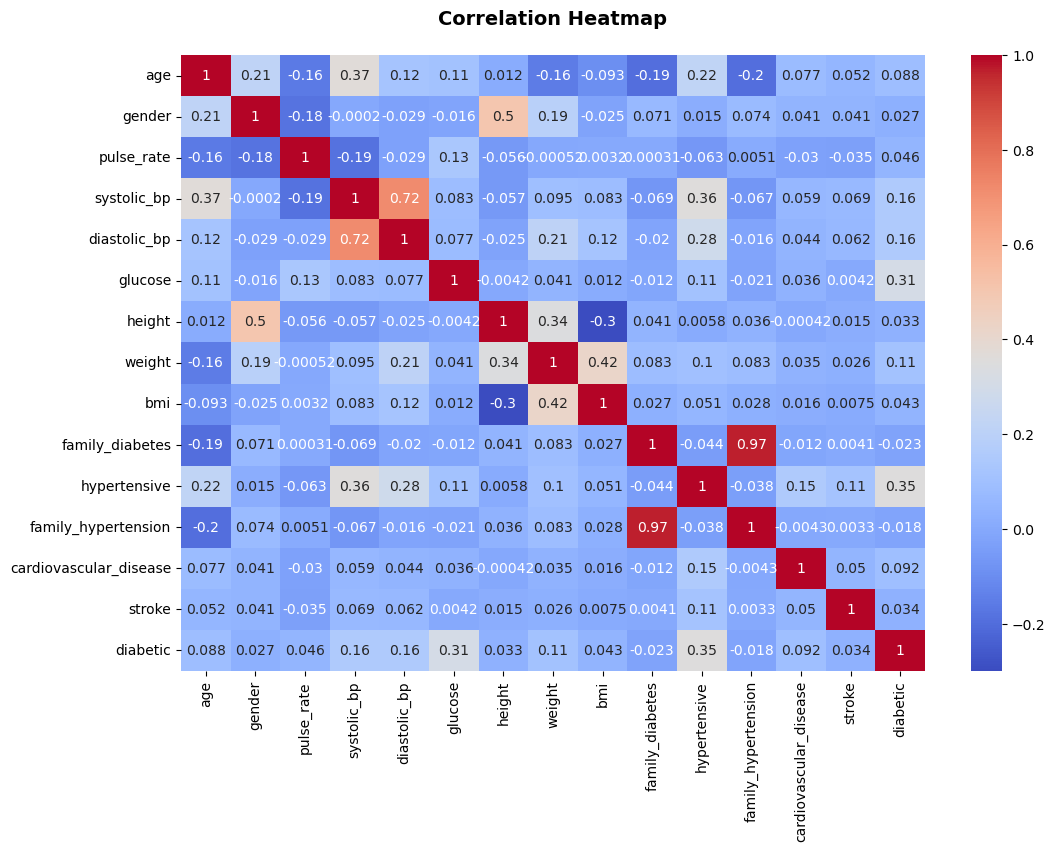

In [330]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

In [331]:
Y = df['diabetic']
X = df.drop('diabetic', axis=1)

In [334]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=1)

In [336]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [338]:
X = ss.fit_transform(X)

In [340]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Apply Random Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

# Print class distribution after undersampling
print("Class distribution after Undersampling:", Counter(y_train))

Class distribution after Undersampling: Counter({0: 235, 1: 235})


In [342]:
y_train

0      0
1      0
2      0
3      0
4      0
      ..
465    1
466    1
467    1
468    1
469    1
Name: diabetic, Length: 470, dtype: int64

In [344]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [346]:
lin_model=LogisticRegression()
# lin_model = LogisticRegression(penalty='l2',C=1,max_iter=4)
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)
linscore = lin_model.score(X_test,y_test)

In [348]:
lin_error = mean_squared_error(y_test, lin_pred)
print("The Mean Squared Error For Linear Regression is: {}".format(lin_error))

The Mean Squared Error For Linear Regression is: 0.16482843137254902


In [350]:
linscore = lin_model.score(X_test,y_test)
lin_cm = confusion_matrix(y_test,lin_pred)
lin_cr = classification_report(y_test,lin_pred)
print('Logistic Regression results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(linscore *100))
print('\n')
print('Confusion Matrix')
print(lin_cm)
print('\n')
print('Classification report')
print(lin_cr)             

Logistic Regression results
---------------------------
Accuracy is 83.52%


Confusion Matrix
[[1283  240]
 [  29   80]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1523
           1       0.25      0.73      0.37       109

    accuracy                           0.84      1632
   macro avg       0.61      0.79      0.64      1632
weighted avg       0.93      0.84      0.87      1632



In [352]:
dtr_model = DecisionTreeClassifier(random_state=0)
dtr_model.fit(X_train,y_train)
dtr_pred = dtr_model.predict(X_test)

In [354]:
dtr_error = mean_squared_error(y_test, dtr_pred)
print("The Mean Squared Error For Decision Tree Regression is: {}".format(dtr_error))

The Mean Squared Error For Decision Tree Regression is: 0.2696078431372549


In [356]:
dtscore = dtr_model.score(X_test,y_test)
dt_cm = confusion_matrix(y_test,dtr_pred)
dt_cr = classification_report(y_test,dtr_pred)
print('Decision Tree results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(dtscore *100))
print('\n')
print('Confusion Matrix')
print(dt_cm)
print('\n')
print('Classification report')
print(dt_cr)   

Decision Tree results
---------------------------
Accuracy is 73.04%


Confusion Matrix
[[1114  409]
 [  31   78]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.73      0.84      1523
           1       0.16      0.72      0.26       109

    accuracy                           0.73      1632
   macro avg       0.57      0.72      0.55      1632
weighted avg       0.92      0.73      0.80      1632



In [358]:
svm_model=SVC(kernel='linear',random_state=0)
svm_model.fit(X_train,y_train)
svm_pred = svm_model.predict(X_test)

In [360]:
svm_error = mean_squared_error(y_test, svm_pred)
print("The Mean Squared Error For Support Vector Machine is: {}".format(svm_error))

The Mean Squared Error For Support Vector Machine is: 0.1403186274509804


In [362]:
svmscore= svm_model.score(X_test, y_test)
svm_cm = confusion_matrix(y_test,svm_pred)
svm_cr = classification_report(y_test,svm_pred)
print('Support Vector Machine results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(svmscore *100))
print('\n')
print('Confusion Matrix')
print(svm_cm)
print('\n')
print('Classification report')
print(svm_cr) 

Support Vector Machine results
---------------------------
Accuracy is 85.97%


Confusion Matrix
[[1329  194]
 [  35   74]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1523
           1       0.28      0.68      0.39       109

    accuracy                           0.86      1632
   macro avg       0.63      0.78      0.66      1632
weighted avg       0.93      0.86      0.89      1632



In [364]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

In [366]:
nb_error = mean_squared_error(y_test, nb_pred)
print("The Mean Squared Error For Naive Bayes classifier is: {}".format(nb_error))

The Mean Squared Error For Naive Bayes classifier is: 0.07230392156862746


In [368]:
nbscore = nb_model.score(X_test,y_test)
nb_cm = confusion_matrix(y_test,nb_pred)
nb_cr = classification_report(y_test,nb_pred)
print('Naive Bayes classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(nbscore *100))
print('\n')
print('Confusion Matrix')
print(nb_cm)
print('\n')
print('Classification report')
print(nb_cr) 

Naive Bayes classifier results
---------------------------
Accuracy is 92.77%


Confusion Matrix
[[1493   30]
 [  88   21]]


Classification report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1523
           1       0.41      0.19      0.26       109

    accuracy                           0.93      1632
   macro avg       0.68      0.59      0.61      1632
weighted avg       0.91      0.93      0.92      1632



In [370]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

In [372]:
knn_error = mean_squared_error(y_test, knn_pred)
print("The Mean Squared Error For K Nearest Neighbour is: {}".format(knn_error))

The Mean Squared Error For K Nearest Neighbour is: 0.2426470588235294


In [374]:
knnscore = nb_model.score(X_test,y_test)
knn_cm = confusion_matrix(y_test,knn_pred)
knn_cr = classification_report(y_test,knn_pred)
print('K Nearest Neighbour results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(knnscore *100))
print('\n')
print('Confusion Matrix')
print(knn_cm)
print('\n')
print('Classification report')
print(knn_cr) 

K Nearest Neighbour results
---------------------------
Accuracy is 92.77%


Confusion Matrix
[[1162  361]
 [  35   74]]


Classification report
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1523
           1       0.17      0.68      0.27       109

    accuracy                           0.76      1632
   macro avg       0.57      0.72      0.56      1632
weighted avg       0.92      0.76      0.82      1632



In [376]:
rf_model = RandomForestClassifier(n_estimators=15, random_state = 0)
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

In [378]:
rf_error = mean_squared_error(y_test, rf_pred)
print("The Mean Squared Error For Random Forest is: {}".format(rf_error))

The Mean Squared Error For Random Forest is: 0.22303921568627452


In [380]:
rfscore = rf_model.score(X_test,y_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cr = classification_report(y_test,rf_pred)
print('Random Forest results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(rfscore *100))
print('\n')
print('Confusion Matrix')
print(rf_cm)
print('\n')
print('Classification report')
print(rf_cr)

Random Forest results
---------------------------
Accuracy is 77.70%


Confusion Matrix
[[1186  337]
 [  27   82]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1523
           1       0.20      0.75      0.31       109

    accuracy                           0.78      1632
   macro avg       0.59      0.77      0.59      1632
weighted avg       0.93      0.78      0.83      1632



In [382]:
gb_model = GradientBoostingClassifier(n_estimators=15, random_state = 0)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

In [384]:
gb_error = mean_squared_error(y_test, gb_pred)
print("The Mean Squared Error For Gradient Boosting Classifier is: {}".format(gb_error))

The Mean Squared Error For Gradient Boosting Classifier is: 0.18872549019607843


In [386]:
gbscore = gb_model.score(X_test,y_test)
gb_cm = confusion_matrix(y_test,gb_pred)
gb_cr = classification_report(y_test,gb_pred)
print('Gradient Boosting Classifier results')
print('---------------------------')
print('Accuracy is {:.2f}%'.format(gbscore *100))
print('\n')
print('Confusion Matrix')
print(gb_cm)
print('\n')
print('Classification report')
print(gb_cr) 

Gradient Boosting Classifier results
---------------------------
Accuracy is 81.13%


Confusion Matrix
[[1246  277]
 [  31   78]]


Classification report
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      1523
           1       0.22      0.72      0.34       109

    accuracy                           0.81      1632
   macro avg       0.60      0.77      0.61      1632
weighted avg       0.93      0.81      0.85      1632



In [388]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
models = {
"Linear Regression": LogisticRegression(),
"Decision Tree": DecisionTreeClassifier(),
"Linear Support Vector Machine": SVC(),
"Naive Bayes Classifier": GaussianNB(),
"K-Nearest Neighbour": KNeighborsClassifier(),
"Random Forest": RandomForestClassifier(),
"Gradient Boosting Classifier": GradientBoostingClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Linear Regression: 83.52%
Decision Tree: 73.04%
Linear Support Vector Machine: 81.68%
Naive Bayes Classifier: 92.77%
K-Nearest Neighbour: 80.64%
Random Forest: 78.62%
Gradient Boosting Classifier: 79.23%


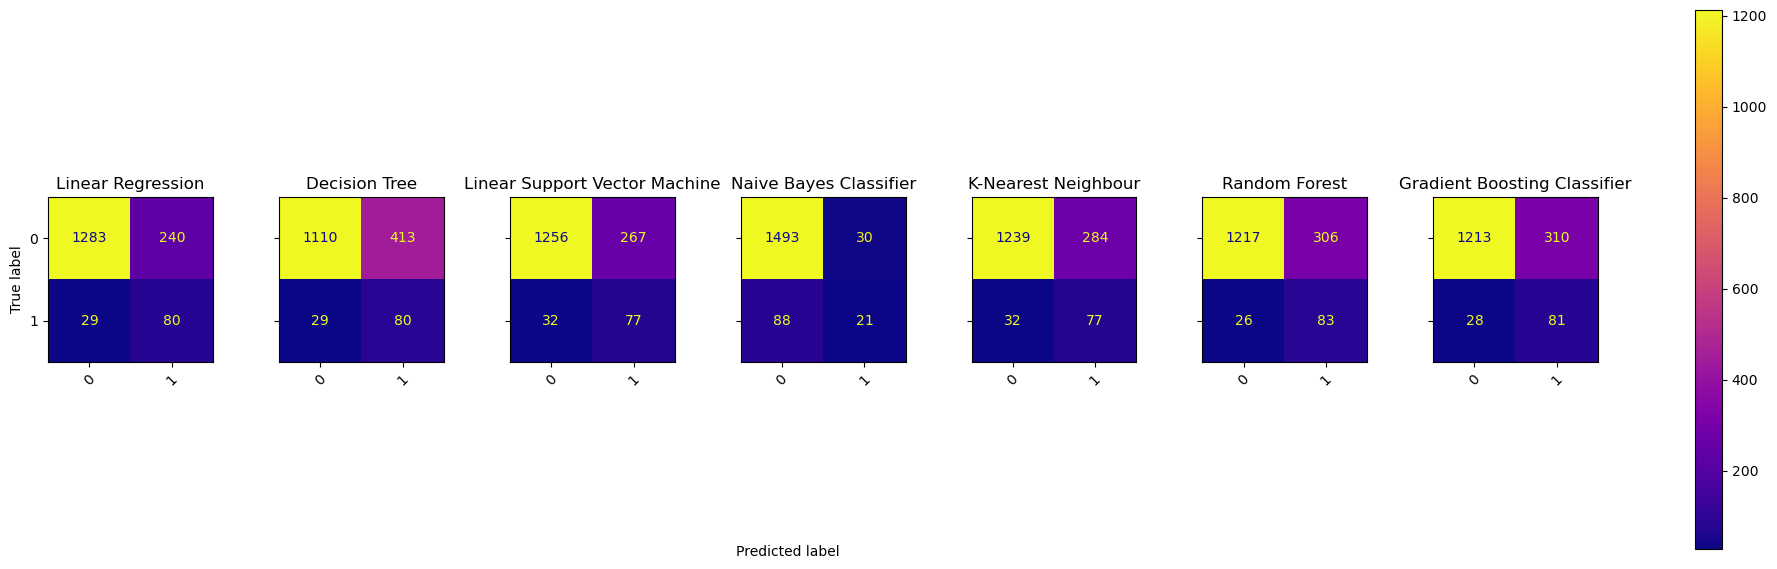

In [389]:
f, axes = plt.subplots(1, 7, figsize=(25, 7), sharey='row')
for i, (name, model) in enumerate(models.items()):
    y_pred = model.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap='plasma')
    disp.ax_.set_title(name)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()